<a href="https://colab.research.google.com/github/r-ap/TrainingMachineLearning/blob/main/BFI_PYIM_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('https://github.com/fahmimnalfrzki/Dataset/blob/main/kc_house_data.csv?raw=true')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data.iloc[:,:10].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0


In [ ]:
data.iloc[:,10:].head()

,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [ ]:
data.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [ ]:
data['bathrooms'] = np.ceil(data.bathrooms)
data.bathrooms.unique()

array([1., 2., 3., 4., 5., 0., 6., 7., 8.])

In [ ]:
data_new = data[data['bathrooms']>0]
data_new

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.0,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.0,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.0,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,1.0,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.0,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
X = data[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long']]
y = data['price']

## Pemisahan Data Train dan Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 50)

## Outlier

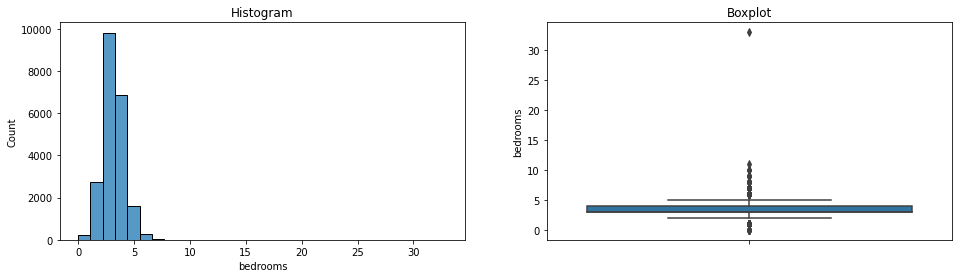

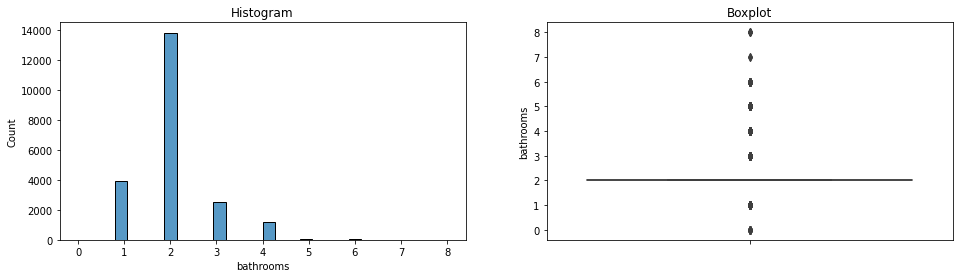

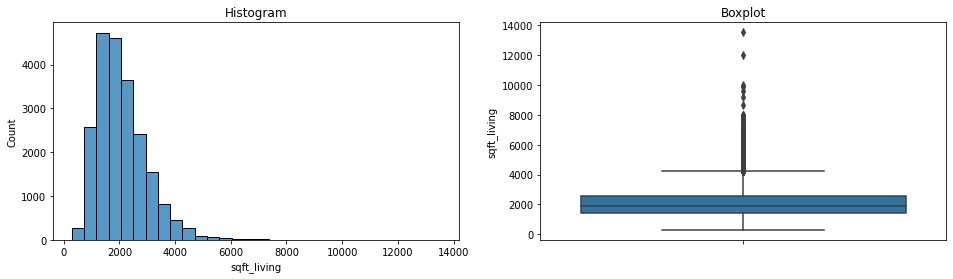

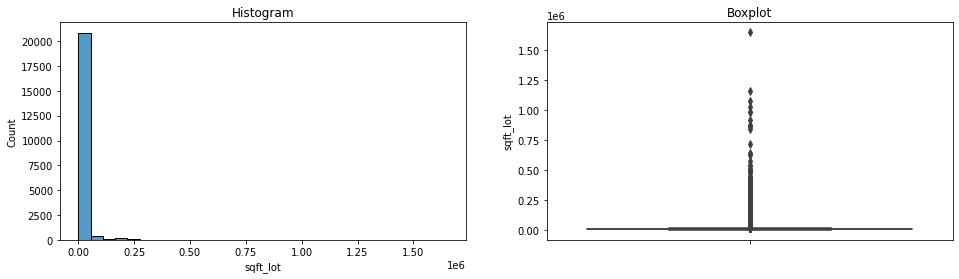

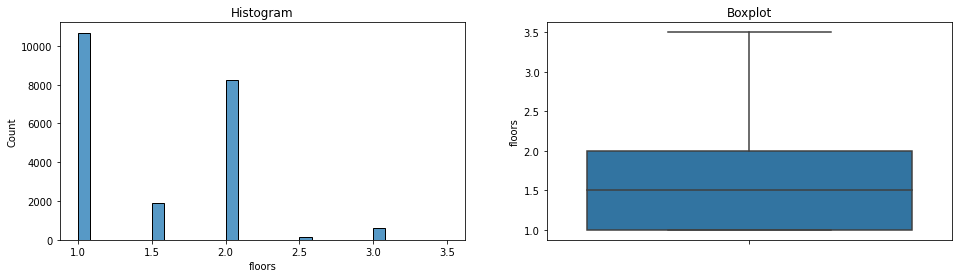

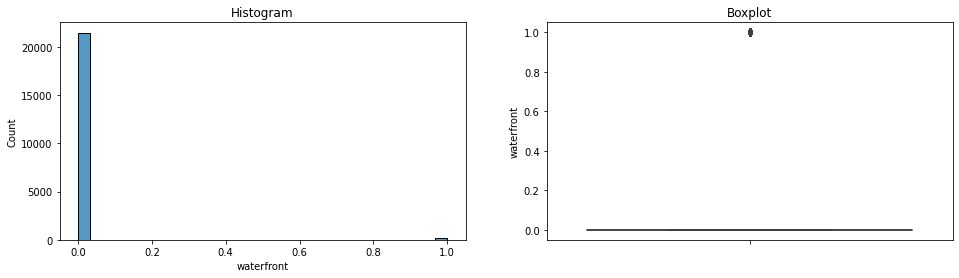

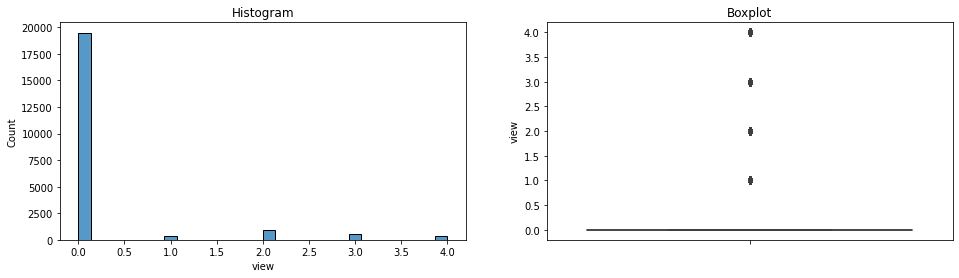

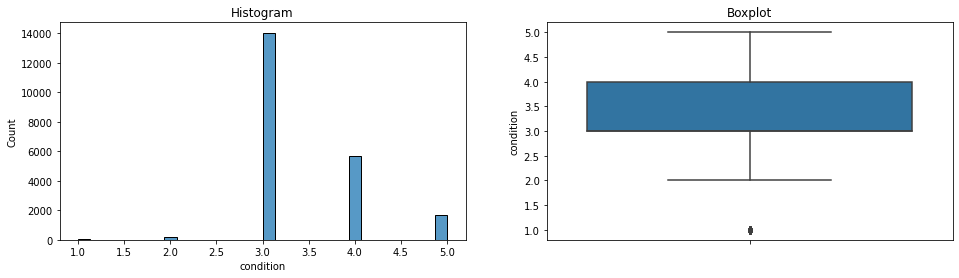

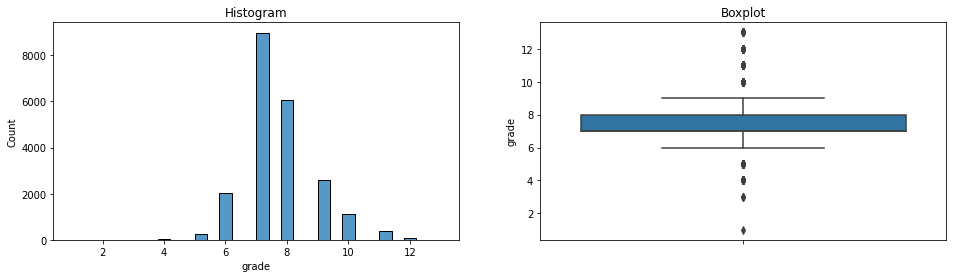

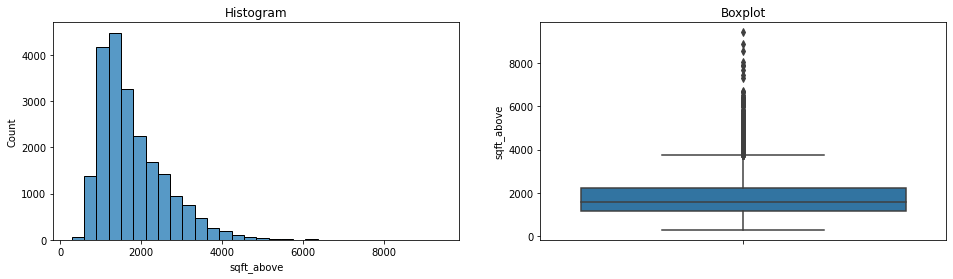

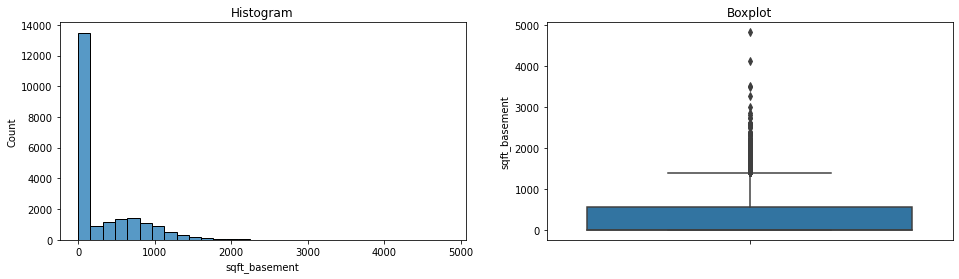

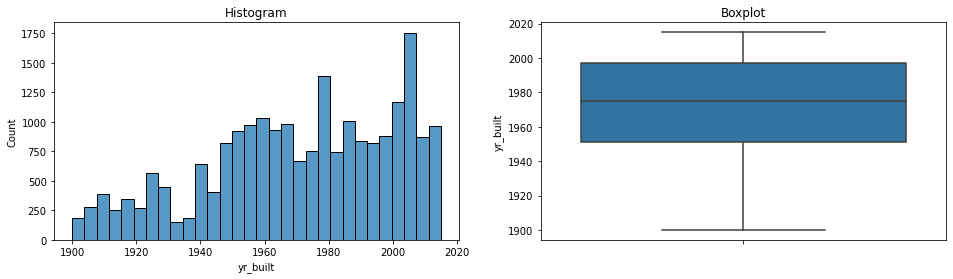

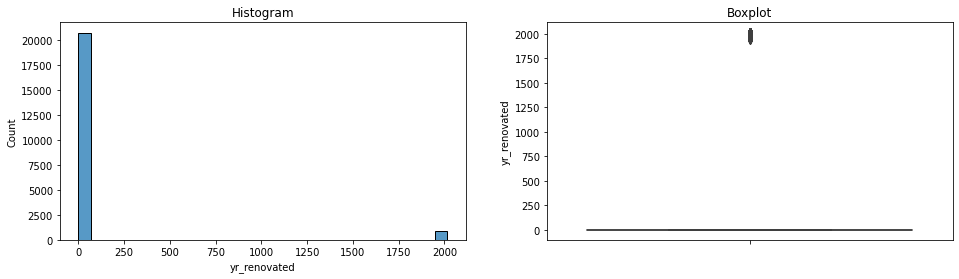

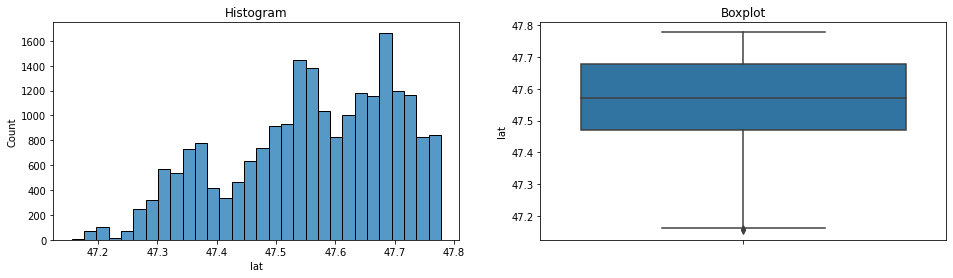

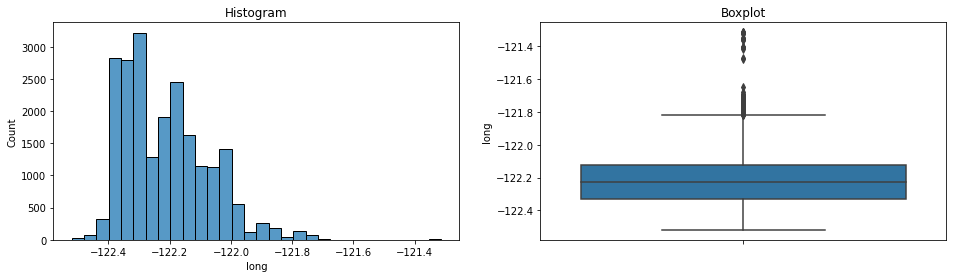

In [ ]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

for col in X.columns:
  diagnostic_plots(X, col)

### Trimming

In [ ]:
X['sqft_living'].skew()

1.471555426802092

In [ ]:
IQR = X['sqft_living'].quantile(0.75) - X['sqft_living'].quantile(0.25)

lower_boundary = X['sqft_living'].quantile(0.25) - (IQR * 1.5)
upper_boundary = X['sqft_living'].quantile(0.75) + (IQR * 1.5)

In [ ]:
sqft_living = X['sqft_living'][(X['sqft_living']>= lower_boundary) & (X['sqft_living']<= upper_boundary)]

In [ ]:
len(X['sqft_living'])

21613

In [ ]:
len(sqft_living)

21041

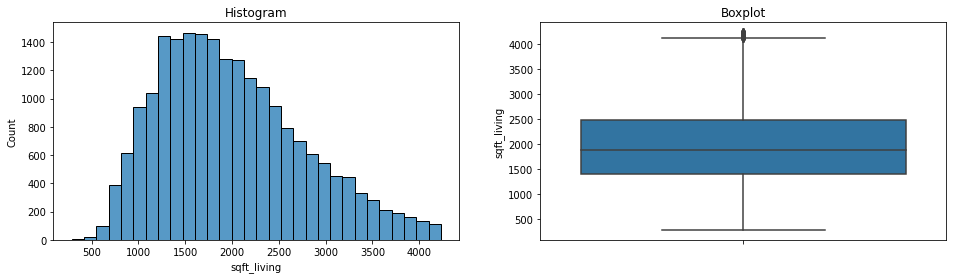

In [ ]:
# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(sqft_living, bins=30)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=sqft_living)
plt.title('Boxplot')

plt.show()

### Censoring/Capping

In [ ]:
!pip install -q feature-engine

from feature_engine.outliers import Winsorizer

     |████████████████████████████████| 276 kB 7.8 MB/s 
     |████████████████████████████████| 9.8 MB 32.6 MB/s 


In [ ]:
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['sqft_living','sqft_lot'])

windsoriser.fit(X[['sqft_living','sqft_lot']])

sqft_liv_cap = windsoriser.transform(X[['sqft_living','sqft_lot']])

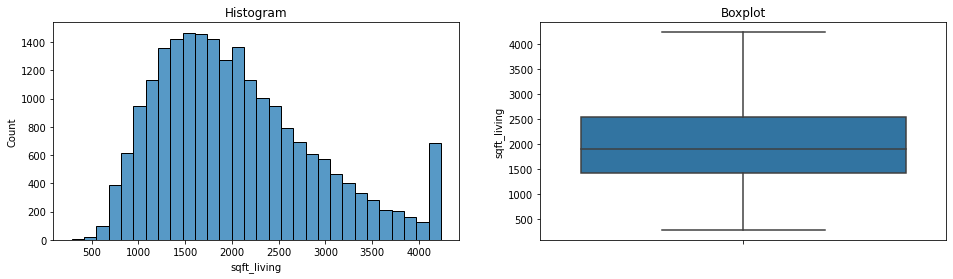

In [ ]:
diagnostic_plots(sqft_liv_cap, 'sqft_living')

In [ ]:
len(X['sqft_living'])

21613

In [ ]:
len(sqft_liv_cap['sqft_living'])

21613